In [1]:
__author__ = 'Anastasia Tsvetkova'
__email__  = 'tsvetkova.lea@gmail.com'

import yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from avalanche import LC, Restored_LC

### Let's generate several light curves

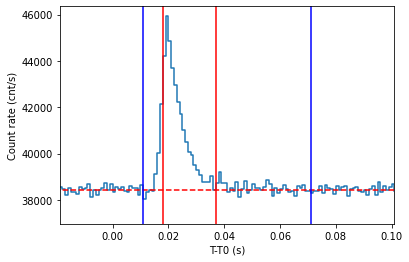

In [2]:
lc = LC(tau_min=0.0009, res=0.001)
par = lc.generate_avalanche()
lc.plot_lc(show_duration=True)


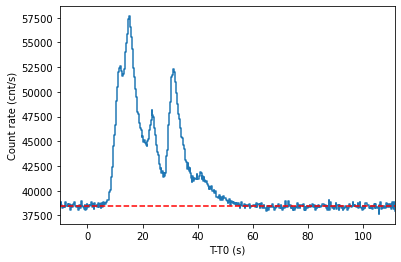

In [62]:
lc = LC()
par = lc.generate_avalanche()
lc.plot_lc(save=False, show_duration=False)

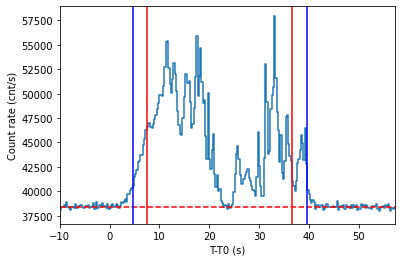

In [3]:
lc = LC(verbose=False) #True
par = lc.generate_avalanche()
lc.plot_lc(save=False, show_duration=True)

### Let's open a yaml-file with avalanches, restore light curves from it, and plot them

In [12]:
with open("./avalanche_parameters.yml", 'r') as f:
        loaded_data = yaml.safe_load(f)

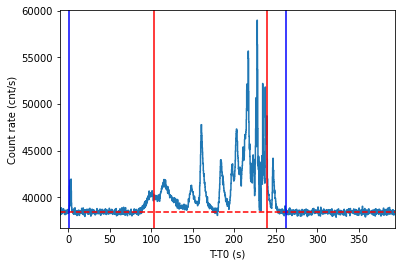

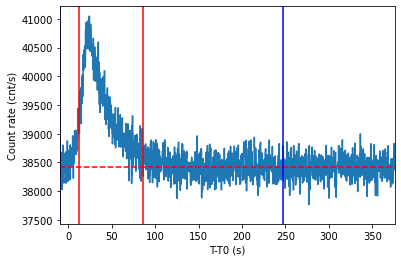

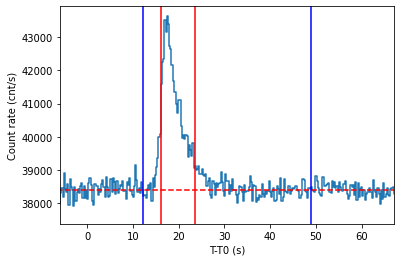

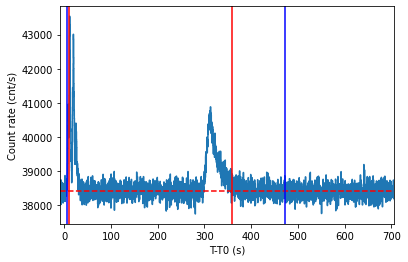

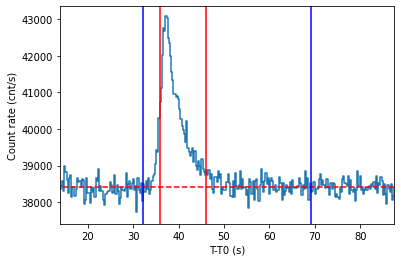

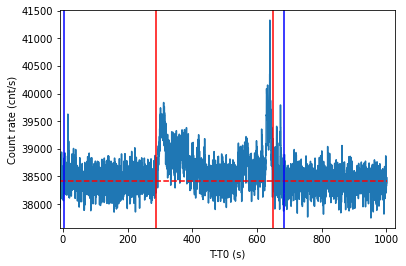

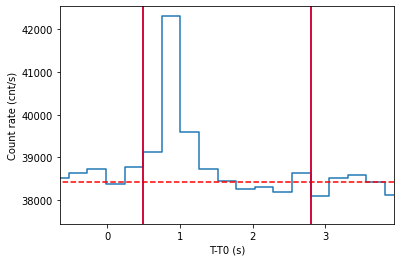

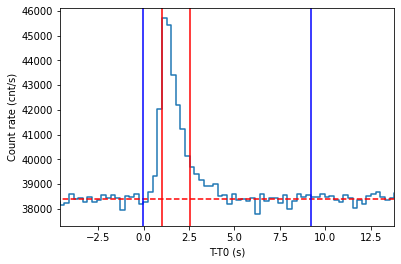

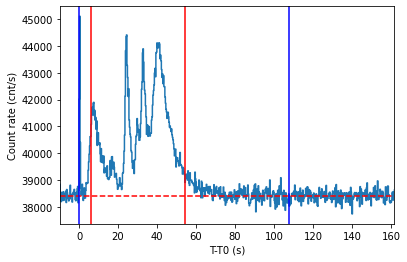

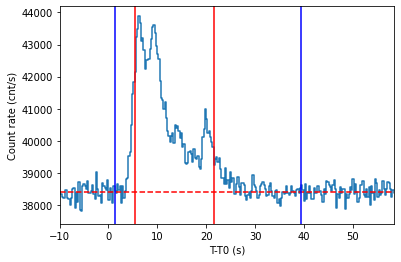

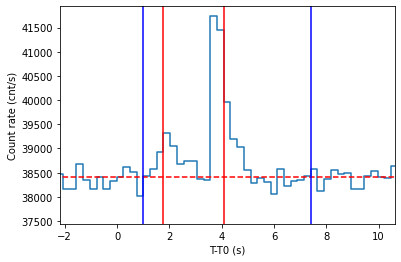

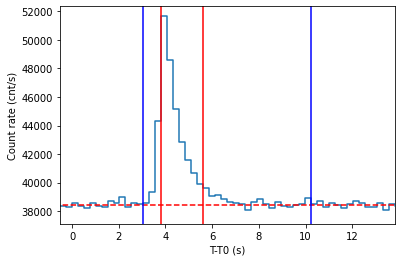

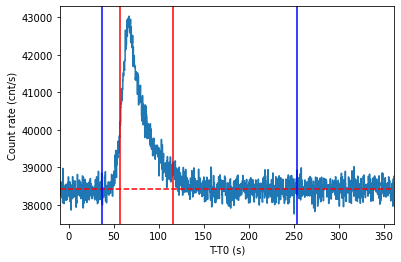

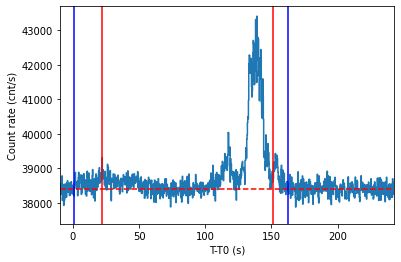

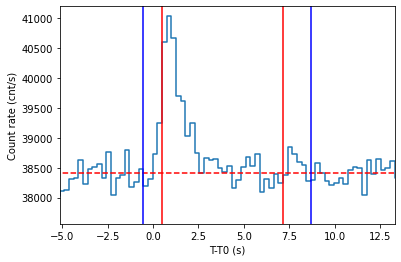

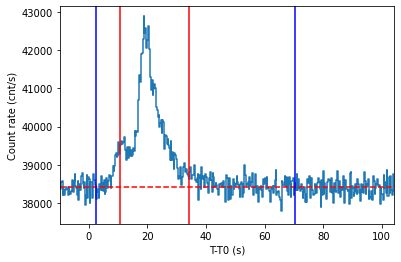

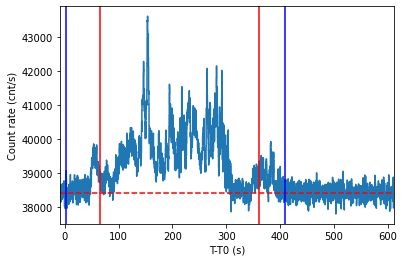

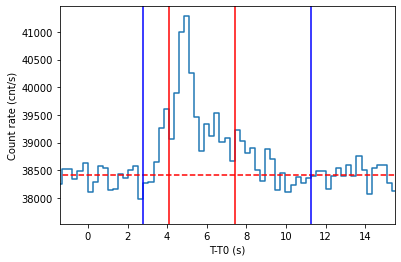

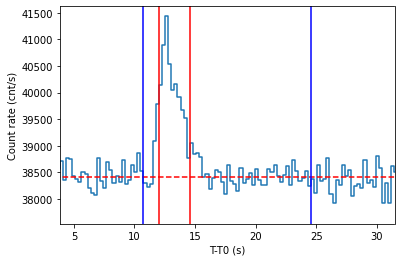

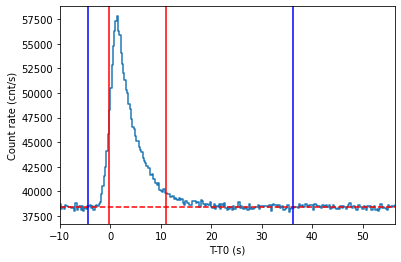

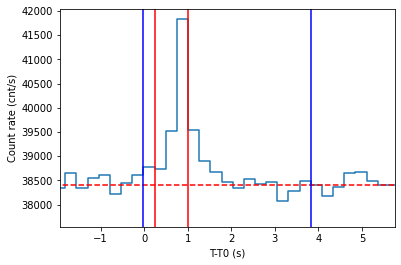

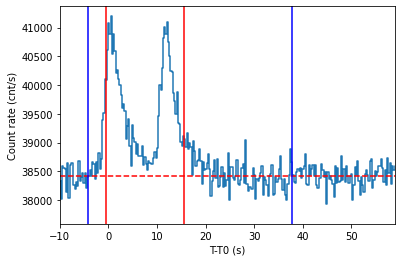

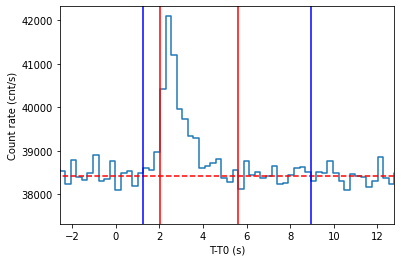

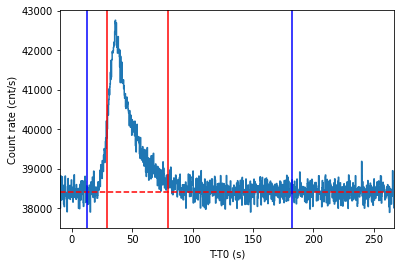

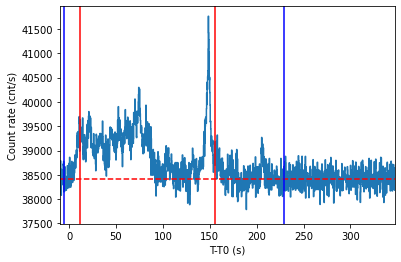

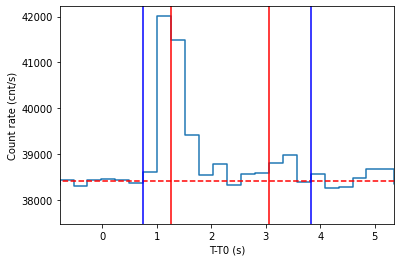

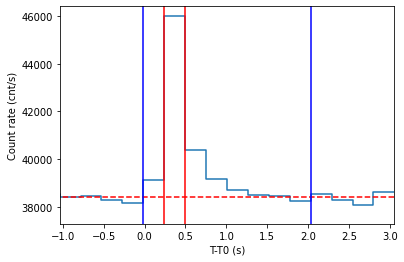

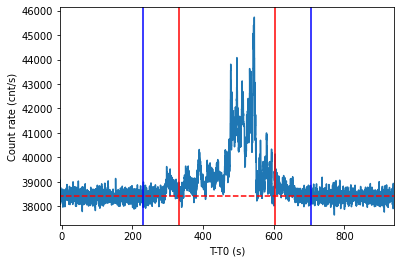

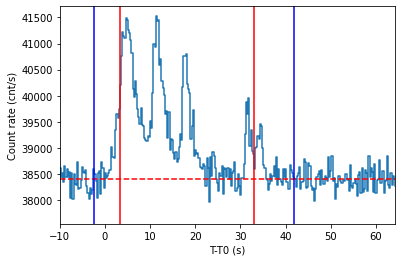

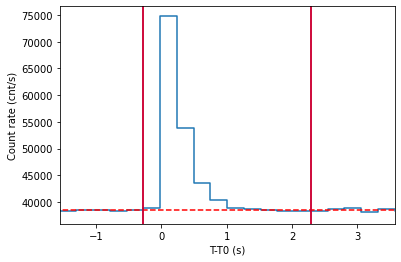

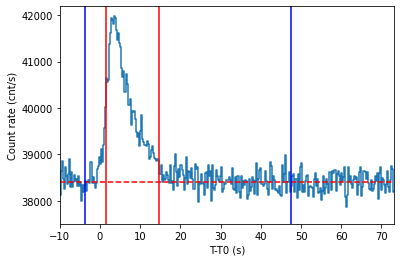

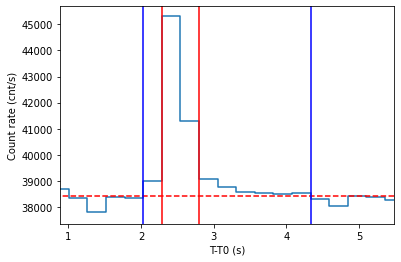

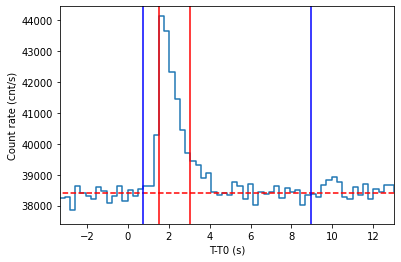

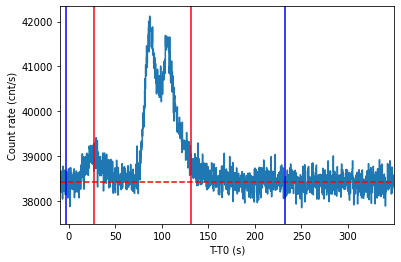

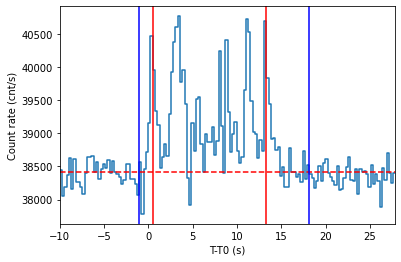

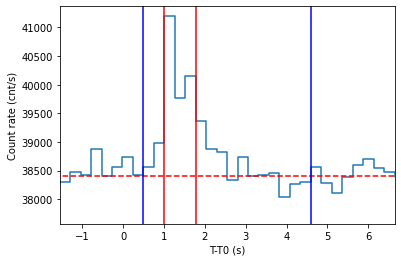

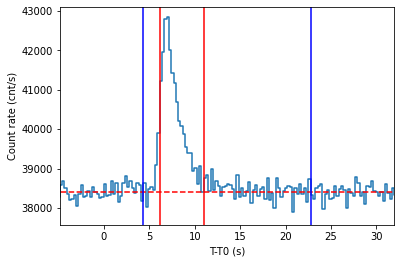

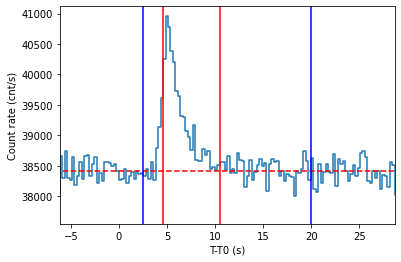

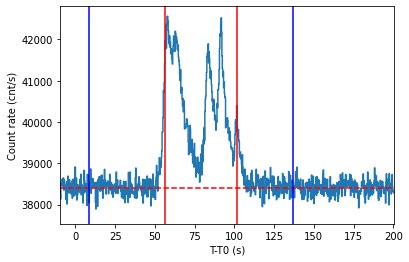

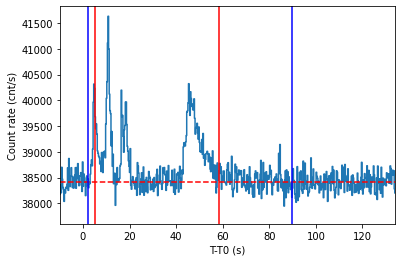

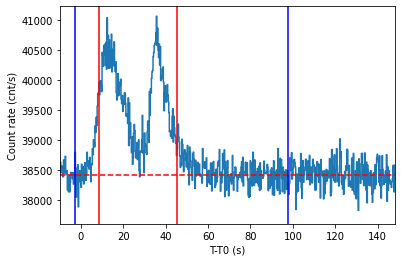

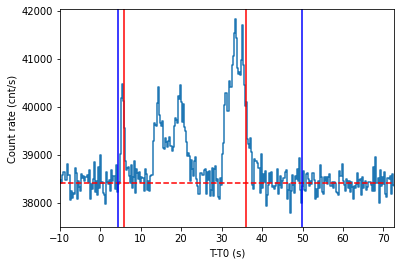

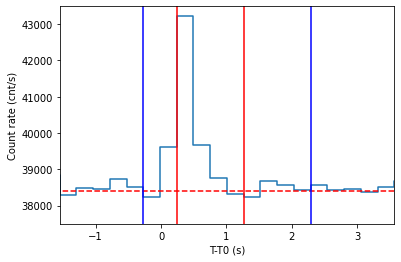

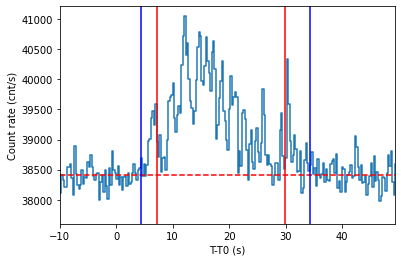

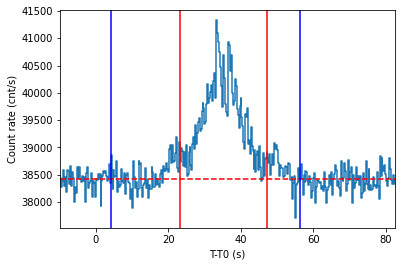

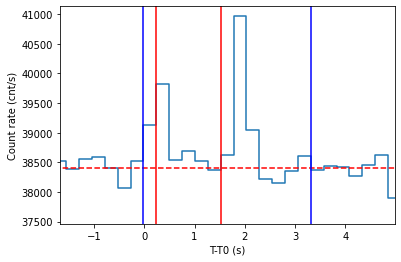

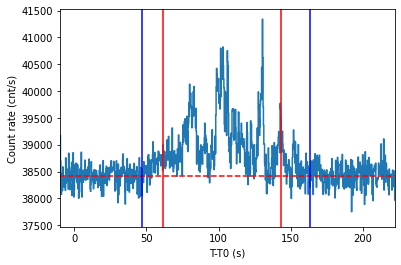

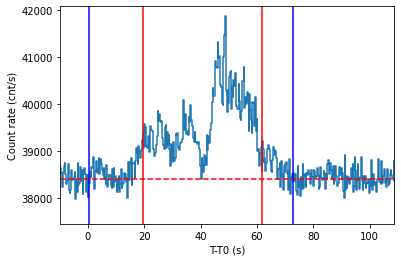

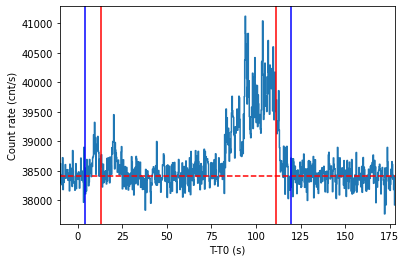

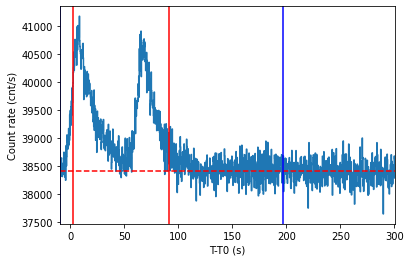

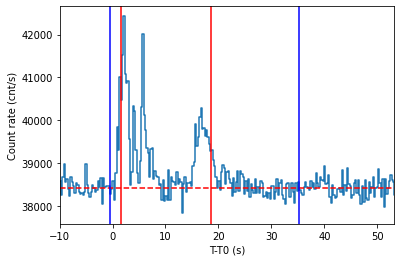

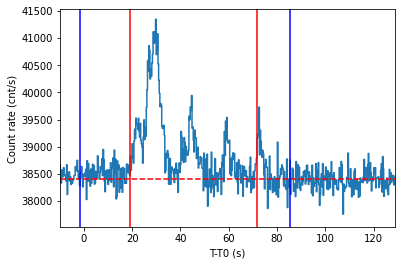

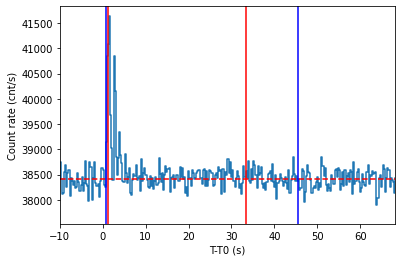

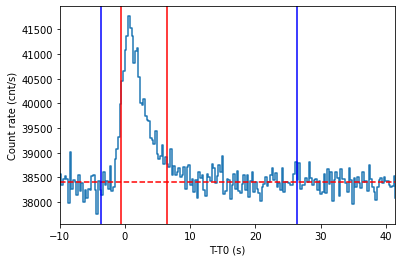

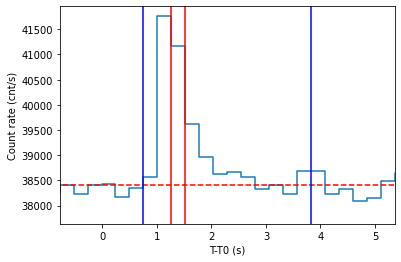

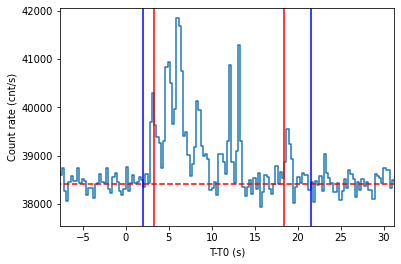

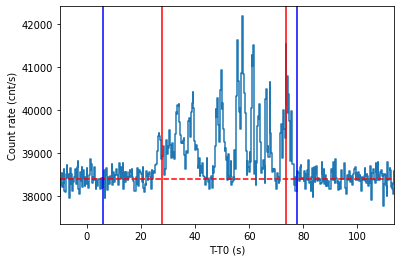

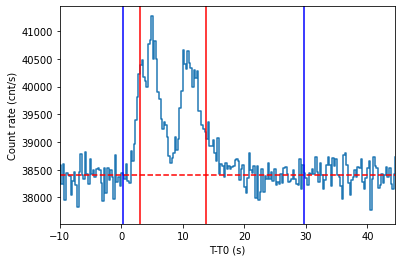

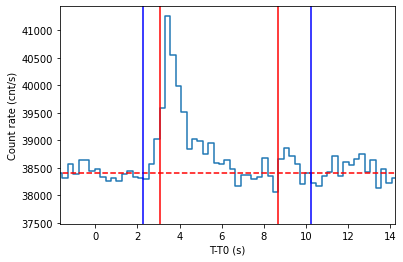

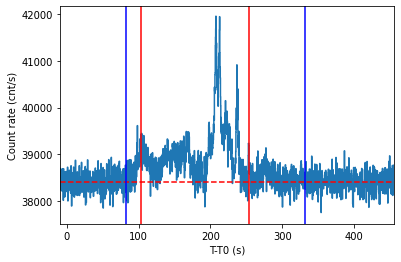

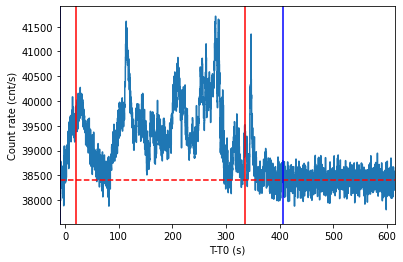

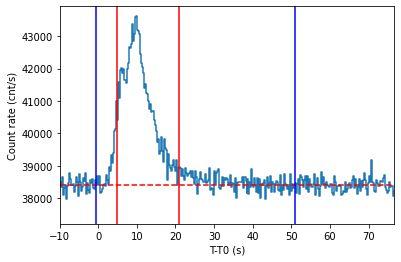

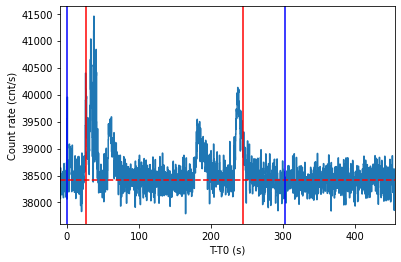

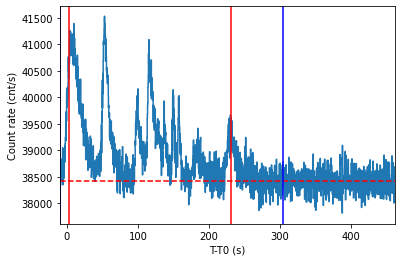

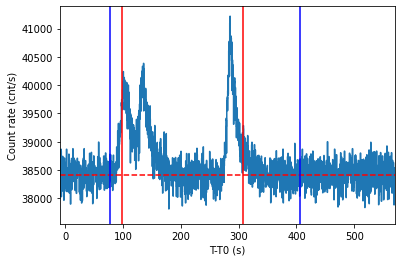

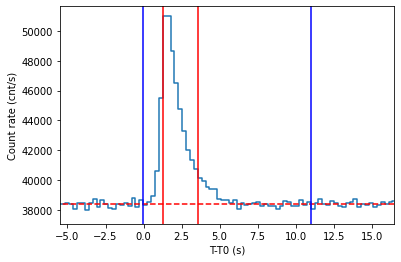

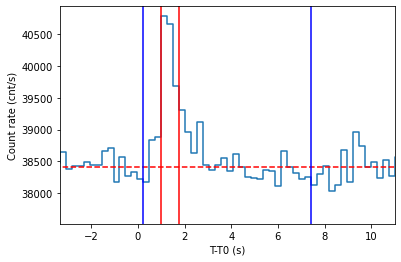

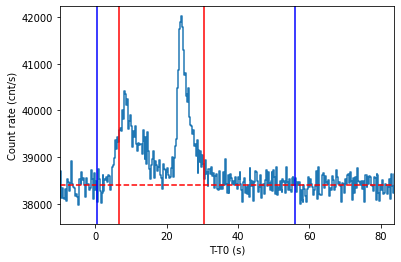

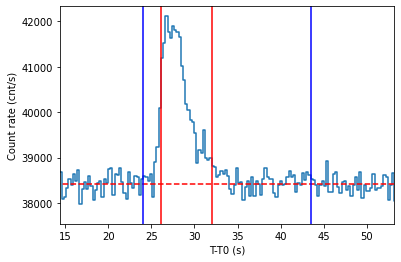

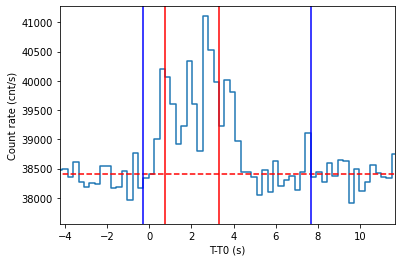

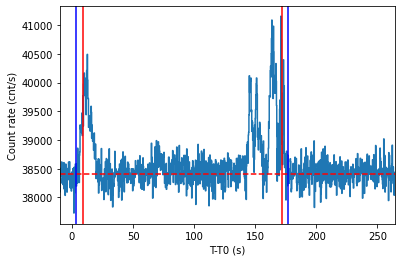

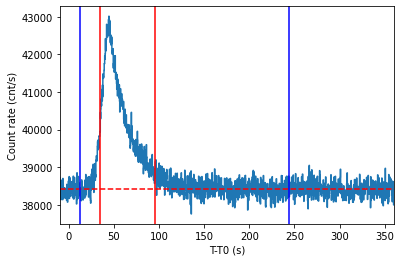

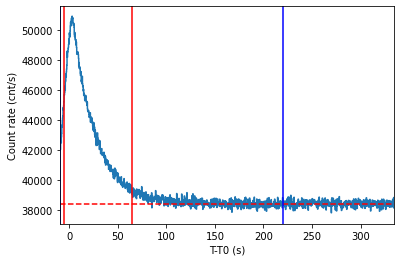

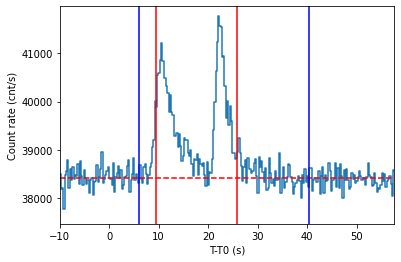

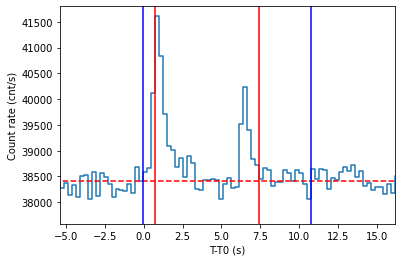

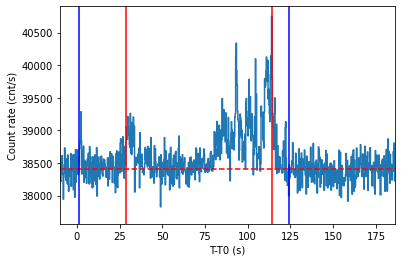

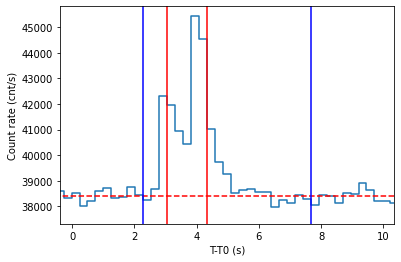

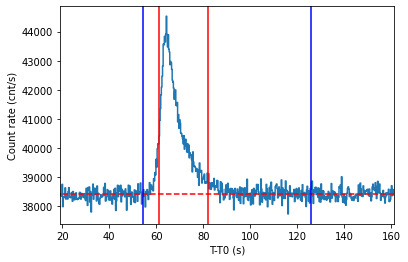

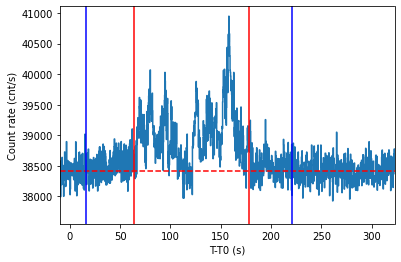

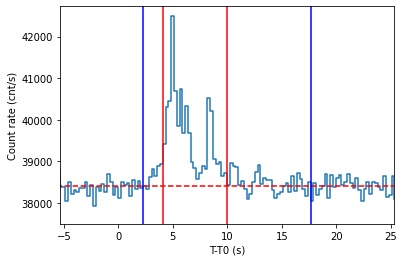

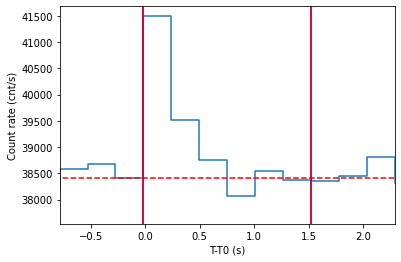

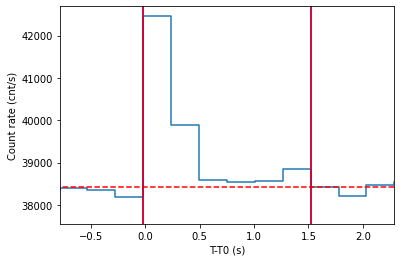

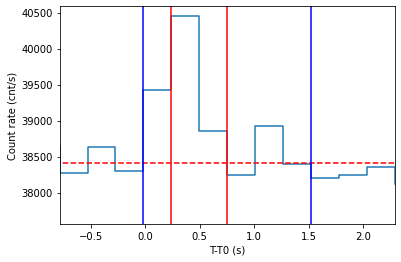

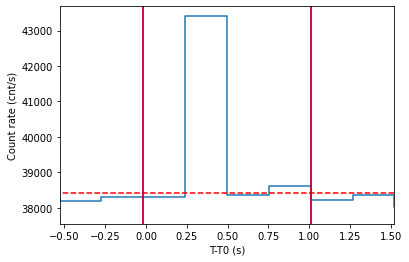

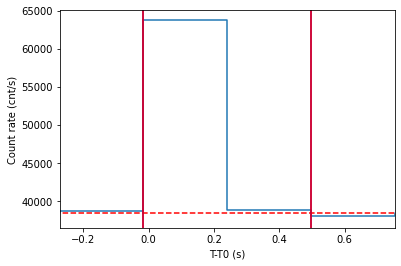

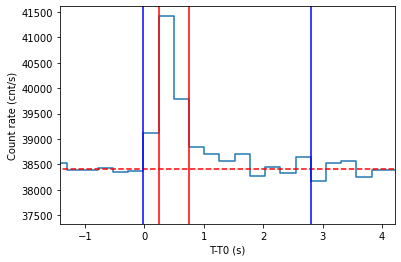

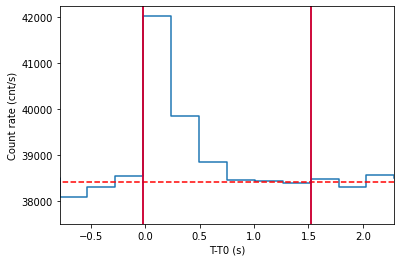

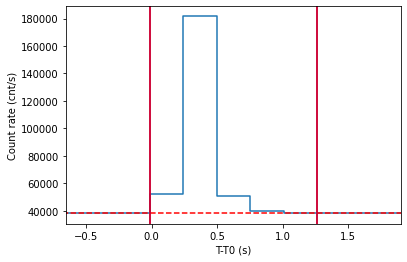

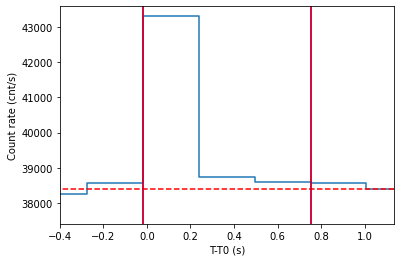

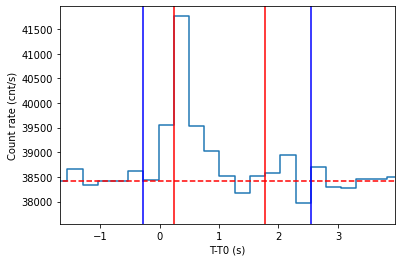

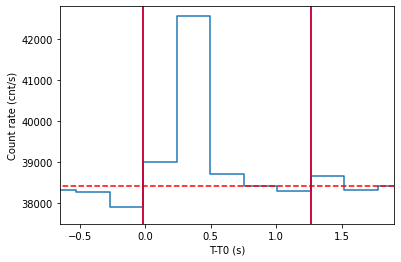

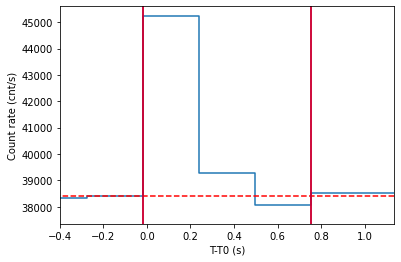

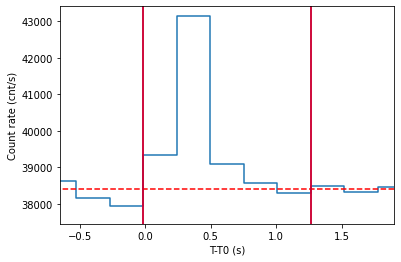

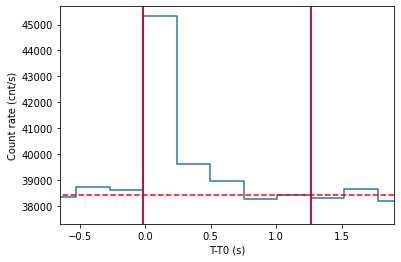

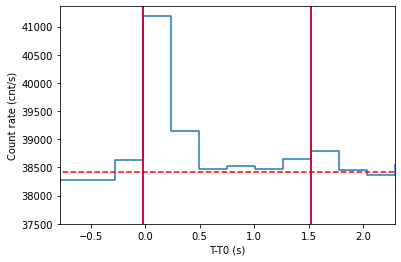

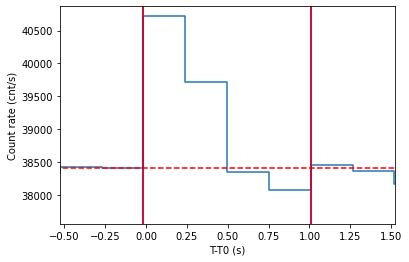

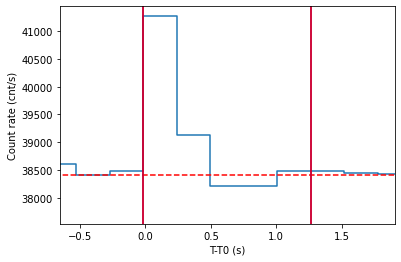

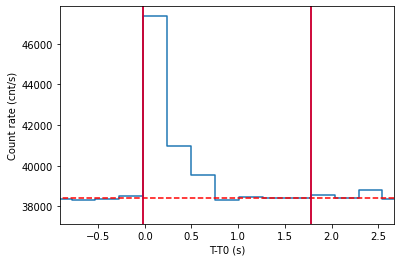

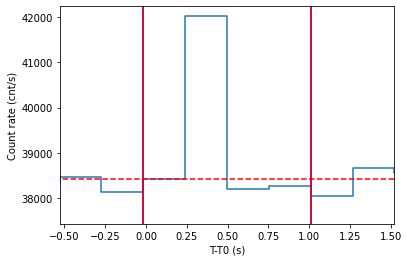

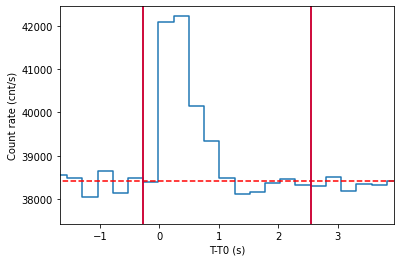

In [13]:
T90 = list()

for name in loaded_data:
    par_list = list(name.values())[0]
    lc = Restored_LC(par_list, sigma=3)
    lc.plot_lc(show_duration=True)
    T90.append(float(lc.T90[0]))
    

### Let's print T90 disribution

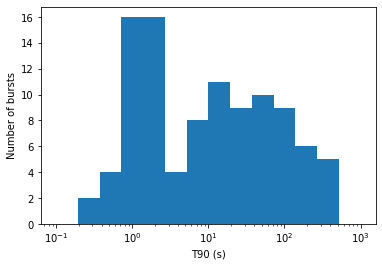

In [18]:
plt.hist(T90, bins=np.geomspace(0.1,1000,15))
plt.xlabel("T90 (s)")
plt.ylabel("Number of bursts")
plt.xscale('log')
plt.show()

### Let's print some light curve parameters

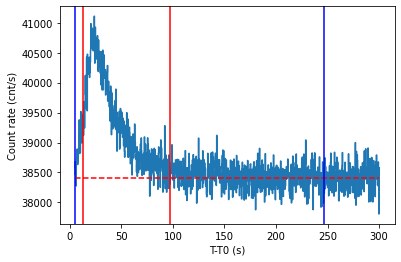

T90 = 84.480 (s), T90_start = 12.936 (s), T90_stop = 97.416 (s)
T100 = 241.920 (s), T100_start = 5.000 (s), T100_stop = 246.920 (s)
Total counts (cnt): 83494.25
Peak rate (cnt/s): 41107.96
Mean rate (cnt/s): 38757.50
Background rate (cnt/s): 38412.00
Peak SNR (cnt/s): 6.96


In [14]:
name = loaded_data[1]
par_list = list(name.values())[0]
lc = Restored_LC(par_list, sigma=3, t_min=5, t_max=300)
lc.plot_lc(rescale=False, show_duration=True)
print("T90 =", lc.T90[0], "(s), T90_start =", lc.T90[1], "(s), T90_stop =", lc.T90[2], "(s)") 
print("T100 =", lc.T100[0], "(s), T100_start =", lc.T100[1], "(s), T100_stop =", lc.T100[2], "(s)")
print("Total counts (cnt):", lc.total_counts)
print("Peak rate (cnt/s):", lc.max_rate)
print("Mean rate (cnt/s):", lc.mean_rate)
print("Background rate (cnt/s):", lc.bg_rate)
print("Peak SNR (cnt/s):", lc.max_snr)